#Mnist - Kaggle dataset

## **Dataset:** https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [1]:
#upload kaggle.json
from google.colab import files
files.upload()
print('Uploaded')

Saving kaggle.json to kaggle.json
Uploaded


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [7]:
!kaggle datasets download -d hojjatk/mnist-dataset

 41% 9.00M/22.0M [00:00<00:00, 25.2MB/s]
100% 22.0M/22.0M [00:00<00:00, 55.4MB/s]


In [8]:
!unzip /content/mnist-dataset.zip -d kaggle

Archive:  /content/mnist-dataset.zip
  inflating: kaggle/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: kaggle/t10k-images.idx3-ubyte  
  inflating: kaggle/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: kaggle/t10k-labels.idx1-ubyte  
  inflating: kaggle/train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: kaggle/train-images.idx3-ubyte  
  inflating: kaggle/train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: kaggle/train-labels.idx1-ubyte  


##Start of Code


In [5]:
import numpy as np
import pandas as pd

MNIST is a subset of a larger set available from NIST (it's copied from http://yann.lecun.com/exdb/mnist/)
Content

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
Four files are available:

    train-images-idx3-ubyte.gz: training set images (9912422 bytes)
    train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
    t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
    t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)


In [9]:
import cv2 
import tensorflow as tf  
import matplotlib.pyplot as plt 

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


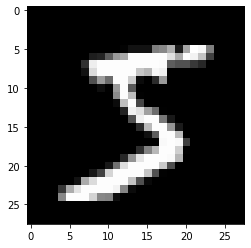

In [16]:
plt.imshow(X_train[0],cmap='gray')

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

##Data Normalization

In [17]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

##ANN

In [18]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) 

model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))   

model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


##COMPILING

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##TRAINING AND TESTING

In [103]:
model.fit(X_train, y_train, epochs=20, batch_size=100)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9945
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0112 - accuracy: 0.9961
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0121 - accuracy: 0.9955
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0144 - accuracy: 0.9951
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9969
Epoch 8/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0128 - accuracy: 0.9956

##MODEL EVALUATION

In [105]:
loss, accuracy = model.evaluate(X_test, y_test)
print('loss: ',loss)
print('Accuracy: ',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1328 - accuracy: 0.9740
loss:  0.13283343613147736
Accuracy:  0.9739999771118164


##PREDICTION

In [106]:
from skimage.io import imread
from skimage import color

In [107]:
from google.colab import files

uploaded = files.upload()

for fn2 in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn2, length=len(uploaded[fn2])))

In [108]:
I = imread(fn2)

In [109]:
I.shape

(151, 117, 3)

In [110]:
img = color.rgb2gray(I)
#plt.imshow(img,cmap = 'gray')
image = cv2.resize(abs(img-1),(28,28))

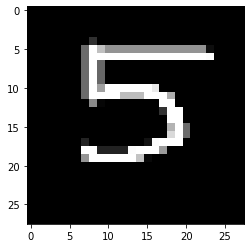

In [111]:
plt.imshow(image,cmap = 'gray')

In [112]:
prediction = model.predict([image.reshape(1,28,28)])
print('Prediction: ', np.argmax(prediction))

Prediction:  5


In [113]:
print(prediction)

[[6.6869664e-30 2.2280968e-19 4.5635487e-20 1.6688589e-05 1.9413143e-18
  9.9998331e-01 4.1432296e-25 2.2957085e-08 5.8448711e-11 1.4993809e-12]]
